In [26]:
import sqlite3

import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

import itertools


# DATASETS (Properly creating/displaying networks)

In [2]:
def save_graph(graph,file_name):
   #initialze Figure
   plt.figure(num=None, figsize=(50, 50), dpi=100)
   plt.axis('off')
   fig = plt.figure(1)
   pos = nx.spring_layout(graph, seed=22)
   nx.draw_networkx_nodes(graph,pos)
   nx.draw_networkx_edges(graph,pos, alpha=0.5)
   nx.draw_networkx_labels(graph,pos)

   plt.savefig(file_name,bbox_inches="tight")
   pylab.close()
   del fig

In [3]:
def read_edge(gph, n0, n1): #add switch between plus and multiply
    if gph.has_edge(n0, n1):
        gph[n0][n1]['weight'] +=1 #*= 2
        return gph[n0][n1]['weight']
    else:
        gph.add_edge(n0, n1, weight=1)
        return 1

## NIPS

In [4]:
#https://www.kaggle.com/code/kevinvdsk/community-detection


connect = sqlite3.connect('../data/NIPS/database.sqlite')
query = """
SELECT pa.paper_id, pa.author_id, a.name AS author_name
FROM paper_authors AS pa JOIN papers AS p ON pa.paper_id = p.id
JOIN authors as a ON pa.author_id = a.id
WHERE p.Year BETWEEN '2015' AND '2018'
ORDER BY paper_id
"""
df_nips = pd.read_sql(query, connect)

# Have a look at data
df_nips.head(10)

,paper_id,author_id,author_name
0,5633,7865,Leon Gatys
1,5633,7866,Alexander S. Ecker
2,5633,2385,Matthias Bethge
3,5634,7867,Ming Liang
4,5634,7868,Xiaolin Hu
5,5634,3841,Bo Zhang
6,5635,5571,Oriol Vinyals
7,5635,7869,?ukasz Kaiser
8,5635,7870,Terry Koo
9,5635,3753,Slav Petrov


In [5]:
len(df_nips['author_id'].unique())

3670

In [6]:
G = nx.Graph()

for p, a in df_nips.groupby('paper_id')['author_name']: 
    # TESTING print(a)
    for a1, a2 in itertools.combinations(a, 2):
        # creates an edge
        read_edge(G, a1, a2)
        

In [7]:
len(G), G.size()

(3637, 8180)

In [8]:
# save_graph(G_NIPS, "../data/NIPS/graph3.pdf")

In [10]:
deg = [i[1] for i in G.degree]
max(deg)

45

In [11]:
deg = [(i[1], i[0]) for i in G.degree]
deg.sort()

In [12]:
# top 10 degree count nodes
deg_nodes = deg[::-1][:10]
deg_nodes

[(45, 'Nicolas Heess'),
 (42, 'Lawrence Carin'),
 (37, 'Ruslan R. Salakhutdinov'),
 (36, 'Oriol Vinyals'),
 (35, 'Yoshua Bengio'),
 (35, 'Razvan Pascanu'),
 (35, 'Pieter Abbeel'),
 (35, 'David Silver'),
 (34, 'Michael I. Jordan'),
 (32, 'Le Song')]

In [44]:
# all nodes connected to the one with the most connections
node_big = deg_nodes[0][1]
clique_nodes = [node[1] for node in G.edges if node[0] == node_big]
clique_nodes.append(node_big)

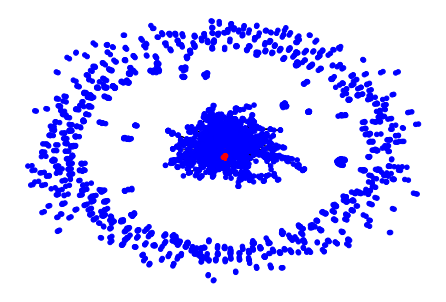

In [46]:
pred_clique_color = ['r' if node in clique_nodes else 'b' for node in G]
nx.draw(G, node_color = pred_clique_color, node_size=20)

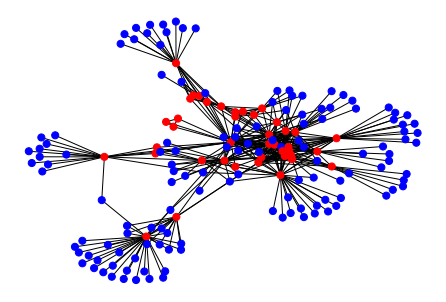

In [45]:
G_big = nx.Graph()

for p, a in df_nips.groupby('paper_id')['author_name']: 
    # TESTING print(a)
    for a1, a2 in itertools.combinations(a, 2):
        if (a1 in clique_nodes) or (a2 in clique_nodes):
            # creates an edge
            read_edge(G_big, a1, a2)

# red is nodes connected to highest degree node
pred_clique_color = ['r' if node in clique_nodes else 'b' for node in G_big]
nx.draw(G_big, node_color = pred_clique_color, node_size=50)


## SNAP Emails

In [9]:
df_snap = pd.read_csv("../data/SNAP_Emails/email-Eu-core.txt", sep=" ", names=["from", "to"])
df_snap

,from,to
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7
...,...,...
25566,420,143
25567,174,859
25568,440,460
25569,52,786


In [55]:
G_SNAP = nx.Graph()
df_snap.apply(lambda x: read_edge(G_SNAP, x[0],x[1]), axis=1)
len(G_SNAP)

1005

In [56]:
save_graph(G_SNAP, "../data/SNAP_Emails/graph2.pdf")


## Random Graph Generator (Test)

# COMMUNITY METHODS

# Degree Counting

In [71]:
# Distribution graph + stats

### Degree Counting in NIPS

<BarContainer object of 46 artists>

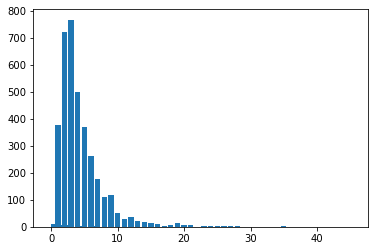

In [73]:
z = nx.degree_histogram(G_NIPS)
plt.hist(z, bins=range(len(z)))
#nx.degree_histogram(G_NIPS)
plt.bar(range(len(z)), z)


# Node Counting

## Pipeline w/ SK

# CLUSTING METHODS

# COMMUNITY + CLUSTER